- **Proyecto Final** - Curso de Minería de Datos
- **Presentado por:** ALEJANDRO MORENO FONSECA
- **Profesor:** ISAAC ZAINEA

# 1. Cargar las librerias

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import TransformerMixin

# 2. Cargar los datos

In [45]:
ruta_archivo = "../Datos/ObesityDataSet_raw_and_data_sinthetic.csv"
Datos = pd.read_csv(ruta_archivo)
Datos

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


No tenemos datos faltantes en ninguna de las variables.

In [46]:
print(Datos.head())
print(Datos.info())
print(Datos.isnull().sum())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

# 3. Descripción de las variables numéricas continuas

In [47]:
Numerica = ["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]
Datos_Numerica = Datos[Numerica]
Datos.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


Veamos los histogramas de las variables numéricas y las gráficas de boxplot para identificar posibles valores atípicos en estas variables:

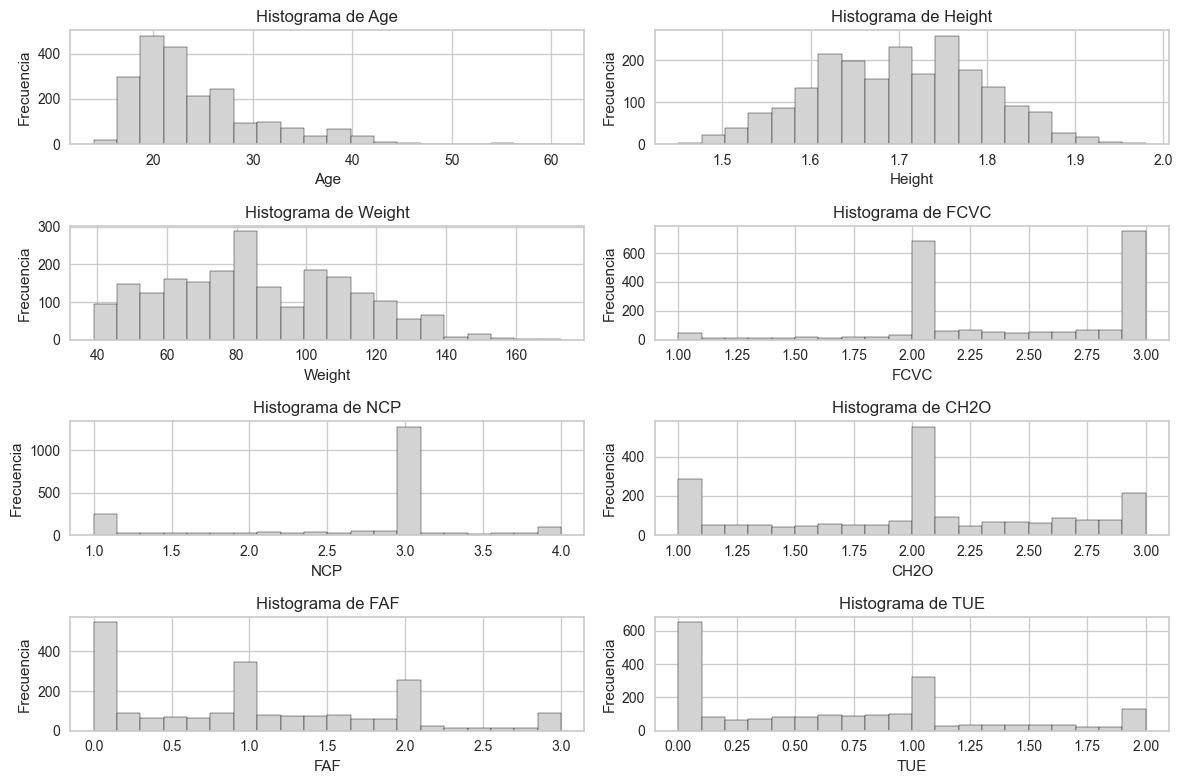

In [48]:
Var_numericas = Datos_Numerica.columns
filas = 4
columnas = 2
fig, axs = plt.subplots(filas, columnas, figsize=(12, 8))
axs = axs.flatten()
for i, columna in enumerate(Var_numericas):
    ax = axs[i]
    ax.hist(Datos_Numerica[columna], bins=20, color='lightgray', edgecolor='black')
    ax.set_title(f'Histograma de {columna}')
    ax.set_xlabel(columna)
    ax.set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

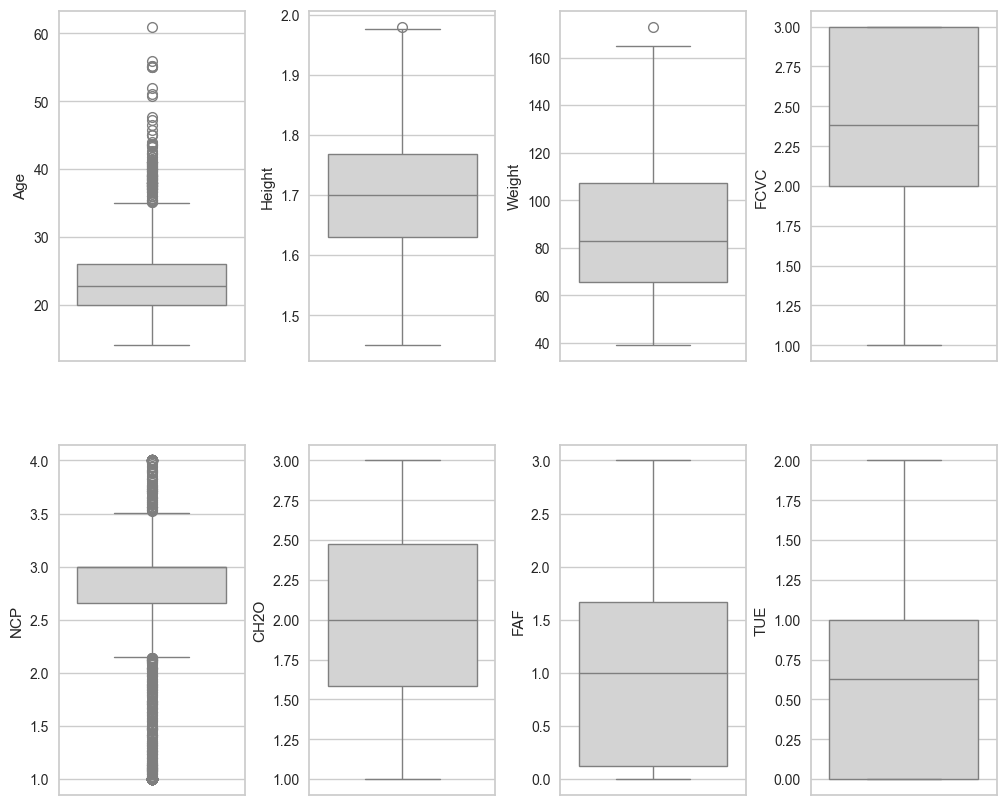

In [49]:
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (10, 8))
idx = 0
axs = axs.flatten()
for k, v in Datos_Numerica.items():
    sns.boxplot(y = k, data = Datos_Numerica, ax = axs[idx], color='lightgray')
    idx += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

Tenemos un conjunto de datos de personas con las siguientes caracteristicas:
  - **Edad promedio:** 24,3 años
  - **Altura promedio:** 1.70 mt
  - **Peso promedio:** 86,5 kg
  - **FCVC promedio veces/día:** 2.419043 (Vegetales)
  - **NCP promedio veces/día:** 2.685628 (Comidas)
  - **CH2O promedio veces/día:** 2.008011 (Agua)
  - **FAF promedio veces/semana:** 1.010298 (Ejercicio) 
  - **TUE promedio Horas/día:** 0.657866 (Dispositivos Electrónicos)

Como las variables de altura y peso no se van a considerar en los análisis posteriores, no requieren ningún ajuste. Pero en los valores promedios y en los histogramas de las variables FCVC, NCP, CH2O, FAF y TUE vemos que sí hay algunos valores atípicos, con decimales cuando deberían ser enteros o con datos que no corresponden con las opciones correctas de respuesta, así que se redondean.

In [50]:
Datos['FCVC'] = Datos['FCVC'].round()
Datos['NCP'] = Datos['NCP'].round()
Datos['CH2O'] = Datos['CH2O'].round()
Datos['FAF'] = Datos['FAF'].round()
Datos['TUE'] = Datos['TUE'].round()

Por último, veamos las correlaciones entre las variables numéricas:

             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045304  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144938  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.296931  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   

             TUE  
Age    -0.296931  
Height  0.051912  
Weight -0.071561  
FCVC   -0.101135  
NCP     0.036326  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000  


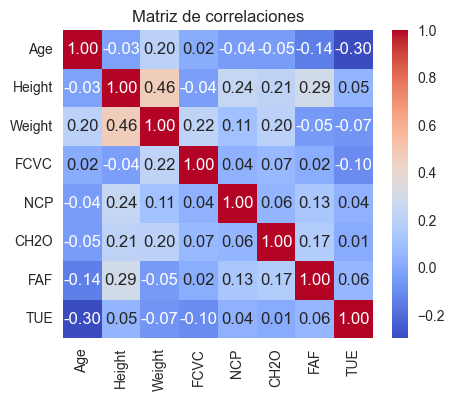

In [51]:
Matriz_Correlaciones = Datos_Numerica.corr()
print(Matriz_Correlaciones)
plt.figure(figsize=(5,4))
sns.heatmap(Matriz_Correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlaciones')
plt.show()

Como era de esperarse, la correlación más alta se presenta entre la altura y el peso. Entre las demás variables, se observan correlaciones débiles entre sí. No se evidencia que haya problemas de multicolinealidad en el dataset para los análisis.

# Nivel de obesidad
Al analizar el nivel de obesidad contra el peso y la altura, es evidente que estas dos variables son determinantes en el Nivel de obesidad: a mayor peso y mayor altura, mayor el nivel de obesidad. Por esta razón, está plenamente justificado excluirlas del análisis, pues resultarían siendo las variables de mayor incidencia al final.

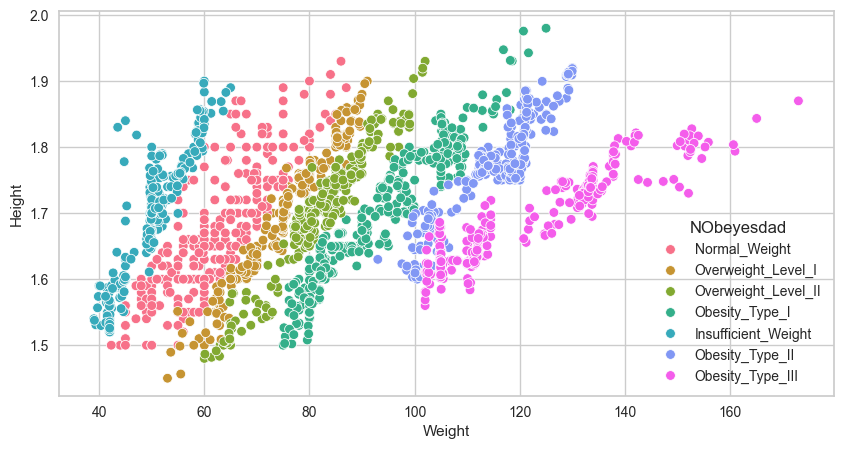

In [52]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.scatterplot(data=Datos,x='Weight',y='Height',hue='NObeyesdad')
plt.show()

# 4. Descripción de las variables categóricas

In [53]:
Datos_Categorica = Datos.select_dtypes(include=[object])
for col in Datos_Categorica.columns:
    print(Datos_Categorica[col].value_counts())

Gender
Male      1068
Female    1043
Name: count, dtype: int64
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64
FAVC
yes    1866
no      245
Name: count, dtype: int64
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64
SMOKE
no     2067
yes      44
Name: count, dtype: int64
SCC
no     2015
yes      96
Name: count, dtype: int64
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


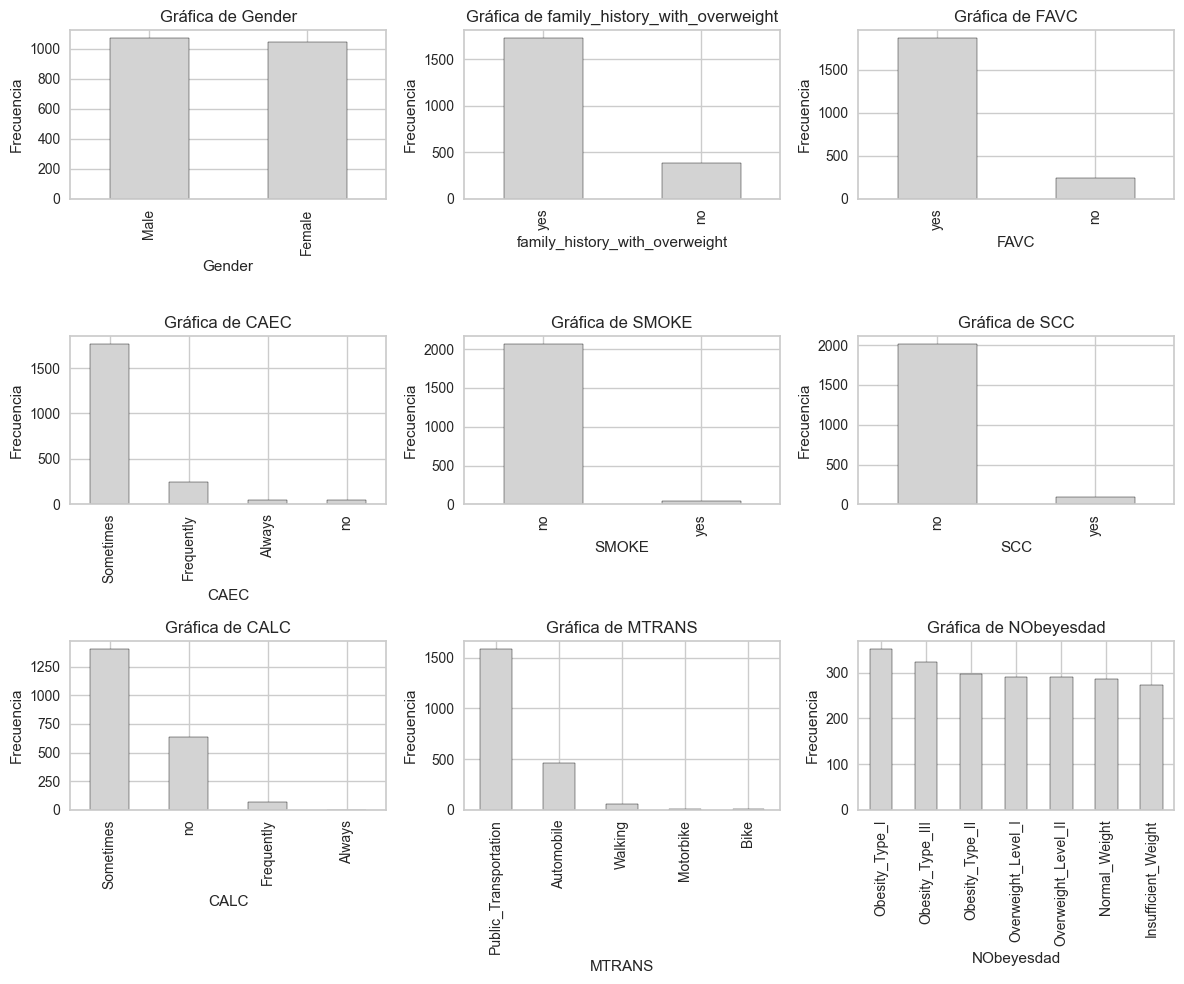

In [54]:
Var_categoricas = Datos_Categorica.columns
filas = 3
columnas = 3
fig, axs = plt.subplots(filas, columnas, figsize=(12, 10))
axs = axs.flatten()
for i, columna in enumerate(Var_categoricas):
    ax = axs[i]
    Datos_Categorica[columna].value_counts().plot(kind='bar', ax=ax, color='lightgray', edgecolor='black')
    ax.set_title(f'Gráfica de {columna}')
    ax.set_xlabel(columna)
    ax.set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Las variables categóricas deben ser codificadas para poder ser utilizadas en los procesamientos siguientes, usando OneHotEncoder y OrdinalEncoder.

La variable de AGE (Edad), se normalizará. Y las variables de peso y estatura no se considerarán en los análisis siguientes.


# 5. Transformación de los Datos

 Ahora realizamos la transformación de los datos para las variables categóricas, numéricas y ordinales. Y el preprocesamiento de los datos.

In [55]:
from sklearn.model_selection import train_test_split

Numericas2 = ["Age","FCVC","NCP","CH2O","FAF","TUE"]
Categoricas2 = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC","MTRANS"]
Ordinales2 = ["CAEC", "CALC"]

Datos_Numericas = Datos[Numericas2]
Datos_Categoricas = Datos[Categoricas2]
Datos_Ordinales = Datos[Ordinales2]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

Transf_Numericas = MinMaxScaler()
Transf_Categoricas = OneHotEncoder(handle_unknown='ignore')
Transf_Ordinales = OrdinalEncoder()

Preprocesamiento = ColumnTransformer(
    transformers=[
        ('NumericasTR', Transf_Numericas, Numericas2),
        ('CategoricasTR', Transf_Categoricas, Categoricas2),
        ('OrdinalesTR', Transf_Ordinales, Ordinales2)
    ],
    verbose_feature_names_out=False,
    )

pipeline = Pipeline(
    [
        ("Preprocesamiento", Preprocesamiento),
     ]
)
pipeline.fit(Datos)

Pipeline(steps=[('Preprocesamiento',
                 ColumnTransformer(transformers=[('NumericasTR', MinMaxScaler(),
                                                  ['Age', 'FCVC', 'NCP', 'CH2O',
                                                   'FAF', 'TUE']),
                                                 ('CategoricasTR',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'FAVC', 'SMOKE', 'SCC',
                                                   'MTRANS']),
                                                 ('OrdinalesTR',
                                                  OrdinalEncoder(),
                                                  ['CAEC', 'CALC'])],
                                   verbose_feature_names_out=False))])

In [56]:
Labels=pipeline['Preprocesamiento']
X=pd.DataFrame(Labels.transform(Datos), columns=Labels.get_feature_names_out())
X.columns

Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Female',
       'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'SMOKE_no',
       'SMOKE_yes', 'SCC_no', 'SCC_yes', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'CAEC', 'CALC'],
      dtype='object')

In [57]:
categories = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

Transf_Ordinales = OrdinalEncoder(categories=[categories])
Y = Transf_Ordinales.fit_transform(Datos[['NObeyesdad']])
Datos_Trans= pd.merge( pd.DataFrame(Y, columns=['NObeyesdad']),X,left_index=True, right_index=True)
Datos_Trans.to_csv('../Datos/Datos_Trans.csv',index=False)
Datos_Trans

,NObeyesdad,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,...,SMOKE_yes,SCC_no,SCC_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,CAEC,CALC
0,1.0,0.148936,0.5,0.666667,0.5,0.000000,0.5,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0
1,1.0,0.148936,1.0,0.666667,1.0,1.000000,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
2,1.0,0.191489,0.5,0.666667,0.5,0.666667,0.5,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
3,2.0,0.276596,1.0,0.666667,0.5,0.666667,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
4,3.0,0.170213,0.5,0.000000,0.5,0.000000,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,6.0,0.148443,1.0,0.666667,0.5,0.666667,0.5,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
2107,6.0,0.169850,1.0,0.666667,0.5,0.333333,0.5,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
2108,6.0,0.181362,1.0,0.666667,0.5,0.333333,0.5,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
2109,6.0,0.220467,1.0,0.666667,1.0,0.333333,0.5,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0


## 6. Reducción de dimensiones - Análisis de Componentes Principales

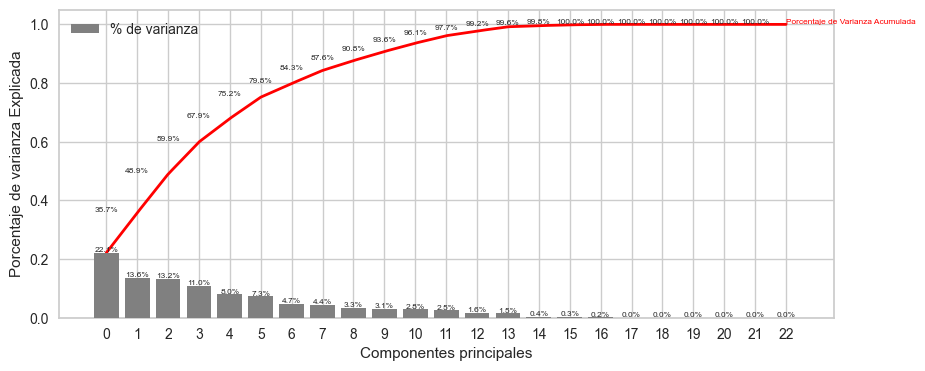

In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# modelo ACP sin limite de dimensiones. Obtenemos las varianzas y valores propios
acp = PCA(n_components=None)
acp.fit_transform(X)
Varianza_explicada = acp.explained_variance_ratio_
Varianza_acumulada = acp.explained_variance_ratio_.cumsum()
Valores_propios = acp.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(10, 4))
x_range = range(len(Varianza_explicada))
ax.bar(x=x_range, height=Varianza_explicada, zorder=20,
       color="gray", label="% de varianza")
ax.text(x=max(x_range), y=Varianza_acumulada[-1], s=f'Porcentaje de Varianza Acumulada', fontsize=6, ha='left', va='bottom', color='red')
ax.set_xlabel("Componentes principales")
ax.set_ylabel("Porcentaje de varianza Explicada")
for i, v in enumerate(Varianza_explicada):
    ax.text(x=i, y=v, s=f"{v*100:.1f}%", fontsize=6, ha='center', va='bottom')
for i, v in enumerate(Varianza_acumulada[1:], start=0):
    ax.text(x=i, y=v, s=f"{v*100:.1f}%", fontsize=6, ha='center', va='bottom')

# Suavizar la línea de porcentaje acumulado de varianza
x_smooth = np.linspace(min(x_range), max(x_range), 300)
y_smooth = np.interp(x_smooth, x_range, Varianza_acumulada)
ax.plot(x_smooth, y_smooth, color='red', linestyle='-', linewidth=2)

ax.set_xticks(x_range, labels=x_range)
ax.legend()
plt.show()

pca = PCA(n_components=3)
pca.fit(Datos_Numericas)
PCA_ds = pd.DataFrame(pca.transform(Datos_Numericas), columns=(["col1","col2","col3"]))
# PCA_ds.describe().T

El análisis de componentes principales ACP, me indica utilizar 3 componentes principales. Con 3 componentes se logra recoger el 60% de la varianza explicada y de allí en adelante, tanto la contribución de los componentes como la varianza acumulada aumenta en menores proporciones.

## 7. Reducción de dimensiones - Método de Clusters K-MEANS

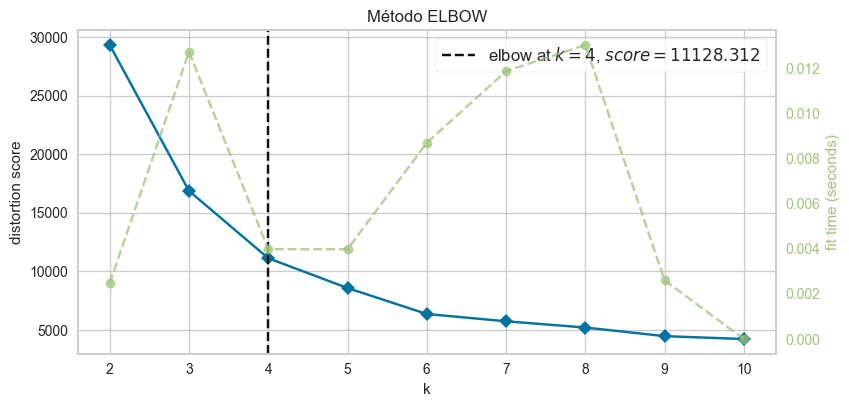

In [59]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

colors = ["red", "green", "blue", "orange", "purple", "brown", "pink", "gray", "cyan", "magenta"]
Elbow_M = KElbowVisualizer(KMeans(random_state=17), k=10, size=(900, 420), colors=colors, title='Método ELBOW', xlabel='k', ylabel='distortion score')
Elbow_M.fit(PCA_ds)
Elbow_M.show();

El análisis del método Elbow indica que es apropiado trabajar con 4 clusters. 